In [65]:
import numpy as np
import pandas as pd
from math import lgamma
from ast import literal_eval, parse
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
#%matplotlib inline

path = '/Users/chrislam/Desktop/sculpting/'
k = pd.Series([833, 134, 38, 15, 5, 0]) # "ground truth" Kepler transit multiplicity

In [66]:
#https://stackoverflow.com/questions/52232742/how-to-use-ast-literal-eval-in-a-pandas-dataframe-and-handle-exceptions
def literal_eval_w_exceptions(x):
    try:
        return literal_eval(str(x))   
    except Exception as e:
        #print(e)
        pass
    
def float_w_exceptions(x):
    try:
        return float(x)   
    except Exception as e:
        #print(e)
        pass

In [72]:
# change path here to get logLs_incremental_corrected.txt
df = pd.read_csv(path+'hipergator/logLs_incremental_corrected2.txt', sep='\t', error_bad_lines=False, skiprows=1, index_col=False,
                 names=['filename','m','b','c','f','logL','transit_multiplicity','intact_frac',
                            'disrupted_frac','intact_frac2','disrupted_frac2','intact_logL','intact_transit_multiplicity','disrupted_logL',
                        'disrupted_transit_multiplicity','young10_logL','young10_transit_multiplicity',
                        'old10_logL','old10_transit_multiplicity','young15_logL','young15_transit_multiplicity',
                        'old15_logL','old15_transit_multiplicity','young20_logL','young20_transit_multiplicity',
                        'old20_logL','old20_transit_multiplicity','young25_logL','young25_transit_multiplicity',
                        'old25_logL','old25_transit_multiplicity','young30_logL','young30_transit_multiplicity',
                        'old30_logL','old30_transit_multiplicity','young35_logL','young35_transit_multiplicity',
                        'old35_logL','old35_transit_multiplicity','young40_logL','young40_transit_multiplicity',
                        'old40_logL','old40_transit_multiplicity','young45_logL','young45_transit_multiplicity',
                        'old45_logL','old45_transit_multiplicity','young50_logL','young50_transit_multiplicity',
                        'old50_logL','old50_transit_multiplicity'], dtype=str)
print(df.head())
#print(df.columns)
print(df.transit_multiplicity[0])
#print(df.logL)

df.transit_multiplicity = df.transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
#df.transit_multiplicity = df.transit_multiplicity.apply(lambda y: np.nan if len(y)==0 else y)
#df.logL = df.logL.apply(str) # convert back from string to list of floats
df.logL = df.logL.apply(float_w_exceptions) # convert back from string to list of floats
df.m = df.m.apply(float_w_exceptions) # convert back from string to list of floats
df.b = df.b.apply(float_w_exceptions) # convert back from string to list of floats
df.c = df.c.apply(float_w_exceptions) # convert back from string to list of floats
df.f = df.f.apply(float_w_exceptions) # convert back from string to list of floats
df.intact_frac = df.intact_frac.apply(float_w_exceptions) # convert back from string to list of floats
df.disrupted_frac = df.disrupted_frac.apply(float_w_exceptions) # convert back from string to list of floats
df.intact_frac2 = df.intact_frac2.apply(float_w_exceptions) # convert back from string to list of floats
df.disrupted_frac2 = df.disrupted_frac2.apply(float_w_exceptions) # convert back from string to list of floats
df.intact_logL = df.intact_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.intact_transit_multiplicity = df.intact_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.disrupted_logL = df.disrupted_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.disrupted_transit_multiplicity = df.disrupted_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young10_logL = df.young10_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young10_transit_multiplicity = df.young10_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old10_logL = df.old10_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old10_transit_multiplicity = df.old10_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young15_logL = df.young15_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young15_transit_multiplicity = df.young15_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old15_logL = df.old15_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old15_transit_multiplicity = df.old15_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young20_logL = df.young20_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young20_transit_multiplicity = df.young20_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old20_logL = df.old20_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old20_transit_multiplicity = df.old20_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young25_logL = df.young25_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young25_transit_multiplicity = df.young25_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old25_logL = df.old25_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old25_transit_multiplicity = df.old25_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young30_logL = df.young30_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young30_transit_multiplicity = df.young30_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old30_logL = df.old30_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old30_transit_multiplicity = df.old30_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young35_logL = df.young35_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young35_transit_multiplicity = df.young35_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old35_logL = df.old35_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old35_transit_multiplicity = df.old35_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young40_logL = df.young40_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young40_transit_multiplicity = df.young40_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old40_logL = df.old40_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old40_transit_multiplicity = df.old40_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young45_logL = df.young45_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young45_transit_multiplicity = df.young45_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old45_logL = df.old45_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old45_transit_multiplicity = df.old45_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young50_logL = df.young50_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young50_transit_multiplicity = df.young50_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old50_logL = df.old50_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old50_transit_multiplicity = df.old50_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats



                                            filename     m    b            c  \
0  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
1  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
2  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
3  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
4  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   

     f                logL            transit_multiplicity intact_frac  \
0  0.0  -5434.568554576411  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]         0.0   
1  0.0  -5434.568554576411  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]         0.0   
2  0.0  -5434.568554576411  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]         0.0   
3  0.0  -5434.568554576411  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]         0.0   
4  0.0  -5434.568554576411  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]         0.0   

  disrupted_frac intact_frac2  ...          old40_logL  \
0            0.0

In [74]:
def normalize(curr_row: pd.Series):
    """
    First, remove fraction of planet-hosting systems from each multiplicity. 
    Then, normalize against sample total planet-hosting systems. 
    """
    #print(curr_row)
    first = curr_row['transit_multiplicity']
    first += [0.] * (6 - len(first)) # pad with zeros to match length of k
    second = curr_row['f']
    #print(first)
    #print(second)
    
    try:
        # remove previous normalization
        first = [np.array(fl)/second for fl in first]
    
        # normalize against Kepler data s.t. sum of every transit multiplicity is 1025
        return [np.array(fl)*sum(k)/sum(first) for fl in first]
    
    except Exception as e: # return list of N nans, where N is length of transit multiplicity array    
        print(e)
        try: # eg. divide by zero for f=0; we don't care about those
            return np.nan*np.ones(len(first))
        
        except: # eg. accessed one too many levels
            return np.nan

def normalized_loglike(lam):
    """
    Calculate Poisson log likelihood
    Changed 0 handling from simulate.py to reflect https://www.aanda.org/articles/aa/pdf/2009/16/aa8472-07.pdf

    Params: 
    - lam: model predictions for transit multiplicity (list of floats)
    - normalized_k: Kepler transit multiplicity divided by sum(k) (list of floats)

    Returns: Poisson log likelihood (float)
    """
    logL = []
    try:
        for i in range(len(lam)):
            if lam[i]==0:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = 0
                logL.append(term1+term2+term3)

            else:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = k[i]*np.log(lam[i])
                logL.append(term1+term2+term3)
    except:
        #print(lam)
        return np.nan
    
    return np.sum(logL)    

#normalized_k = k/sum(k)
df['normalized_transit_multiplicity'] = df.apply(func=normalize, axis=1)
#df['normalized_logL'] = better_loglike(df['normalized_transit_multiplicity'], normalized_k)
df['normalized_logL'] = df['normalized_transit_multiplicity'].apply(func=normalized_loglike)



/var/folders/h2/sp_lfvz5515bhg_y92psw7f80000gn/T/ipykernel_55956/2703327151.py:15: RuntimeWarning: invalid value encountered in true_divide
  first = [np.array(fl)/second for fl in first]


In [75]:
df.intact_frac # old way of calculating fraction of total FGK systems that are intact

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
78315    0.9
78316    0.9
78317    1.0
78318    1.0
78319    1.0
Name: intact_frac, Length: 78320, dtype: float64

In [76]:
df.intact_frac2 # new way of calculating fraction of planet-hosting FGK systems that are intact

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
78315    1.0
78316    1.0
78317    1.0
78318    1.0
78319    1.0
Name: intact_frac2, Length: 78320, dtype: float64

In [77]:
df.disrupted_frac2

0        1.000000
1        0.999985
2        1.000000
3        1.000000
4        1.000000
           ...   
78315    0.000000
78316    0.000000
78317    0.000000
78318    0.000000
78319    0.000000
Name: disrupted_frac2, Length: 78320, dtype: float64

In [86]:
def better_loglike(lam, k):
    """
    Calculate Poisson log likelihood
    Changed 0 handling from simulate.py to reflect https://www.aanda.org/articles/aa/pdf/2009/16/aa8472-07.pdf

    Params: 
    - lam: model predictions for transit multiplicity (list of ints)
    - k: Kepler transit multiplicity (list of ints); can accept alternate ground truths as well

    Returns: Poisson log likelihood (float)
    """
    
    logL = []
    #print(lam)
    for i in range(len(lam)):
        try:
            if lam[i]==0:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = 0
                logL.append(term1+term2+term3)

            else:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = k[i]*np.log(lam[i])
                logL.append(term1+term2+term3)
        except Exception as e:
            #print("error here: ", lam)
            #print("error: ", e)
            return lam

    return np.sum(logL)

def pad(lam):
    lam += [0.] * (6 - len(lam)) # pad with zeros to match length of k
    return lam

def fix_c_for_flat_models(m, c):
    if m==0:
        return 1e8
    else:
        return c
    
def redundancy_check(m, b, cutoff):
    # skip simulations if cutoff occurs more than once after probability has reached zero (use the first one for all)
    # also don't vary cutoffs if m is flat   

    y = b + m*(np.log10(cutoff)-8)
    if y < 0:
        return False
    #elif m==0:
    #    return False
    else:
        return True
    
### in order to marginalize over posteriors, I need to add. In order to add, I need to unlog
df['likelihood'] = np.exp(df['logL'])
    
# c's that span cutoff time parameter space don't make sense for m=0. Set those all to minimum cutoff time.
df['fixed_c'] = df.apply(lambda x: fix_c_for_flat_models(x.m, x.c), axis=1)
df['redundant'] = df.apply(lambda x: redundancy_check(x.m, x.b, x.fixed_c), axis=1)

# re-evaluate logL based on new k
#df['padded_transit_multiplicities'] = df.transit_multiplicity.apply(pad)

#df['corrected_logL'] = df.padded_transit_multiplicities.apply(lambda x: better_loglike(x, pad(list(k))))


In [87]:
print(len(df.loc[df.normalized_logL > -50]), len(df.loc[df.logL > -50]))

9750 949


In [88]:
### make logL-based cut
threshold = -50
df_keep = df.loc[(df.logL >= threshold)] 
print(len(df_keep))

949


remaining based on transit multiplicity:  949
remaining after ruling out intact fractions:  526


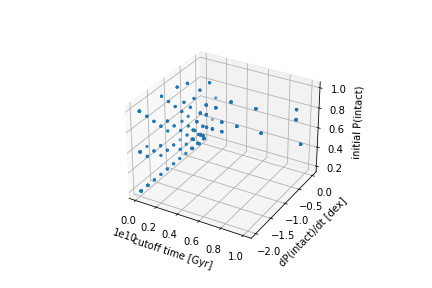

In [89]:
%matplotlib widget

#df_keep['intact_frac_over_planets'] = df_keep.intact_frac/(df_keep.intact_frac+df_keep.disrupted_frac)
#df_keep = df_keep.loc[df_keep.corrected_logL >= threshold] # rule out models based on transit multiplicity
print("remaining based on transit multiplicity: ", len(df_keep))
df_keep = df_keep.loc[(df_keep.intact_frac2 <= 0.44) & (df_keep.intact_frac2 >= 0.12)]
print("remaining after ruling out intact fractions: ", len(df_keep))
#df_keep = df
fig = plt.figure()
ax = plt.axes(projection='3d')

#im = ax.scatter3D(df_keep.c, df_keep.m, df_keep.b, c=df_keep.normalized_logL, s=5)
im = ax.scatter3D(df_keep.fixed_c, df_keep.m, df_keep.b, s=5)
#im1 = ax.scatter3D(df_keep.loc[df_keep.index==1220].c, df_keep.loc[df_keep.index==1220].m, df_keep.loc[df_keep.index==1220].b, s=8, c='r')
#im2 = ax.scatter3D(df_keep.loc[df_keep.index==73279].c, df_keep.loc[df_keep.index==73279].c, df_keep.loc[df_keep.index==73279].c, s=8, c='purple')
ax.set_xlabel('cutoff time [Gyr]')
#ax.set_xscale('log')
ax.set_ylabel('dP(intact)/dt [dex]')
ax.set_zlabel('initial P(intact)')
#fig.colorbar(im, ax=ax)
#fig.tight_layout()
plt.show()

In [90]:
df.loc[df.logL > -50][['m', 'b','fixed_c', 'f']]

,m,b,fixed_c,f
1230,-2.0,0.1,100000000.0,0.2
1231,-2.0,0.1,100000000.0,0.2
1232,-2.0,0.1,100000000.0,0.2
1233,-2.0,0.1,100000000.0,0.2
1234,-2.0,0.1,100000000.0,0.2
...,...,...,...,...
74407,0.0,0.2,100000000.0,0.2
74408,0.0,0.2,100000000.0,0.2
74409,0.0,0.2,100000000.0,0.2
74410,0.0,0.2,100000000.0,0.2


In [91]:
df.loc[df.logL > -50][['intact_frac2', 'disrupted_frac2','f']]

,intact_frac2,disrupted_frac2,f
1230,0.100564,0.899436,0.2
1231,0.100267,0.899733,0.2
1232,0.101365,0.898635,0.2
1233,0.098828,0.901172,0.2
1234,0.099466,0.900534,0.2
...,...,...,...
74407,0.200030,0.799970,0.2
74408,0.201692,0.798308,0.2
74409,0.200787,0.799213,0.2
74410,0.198442,0.801558,0.2


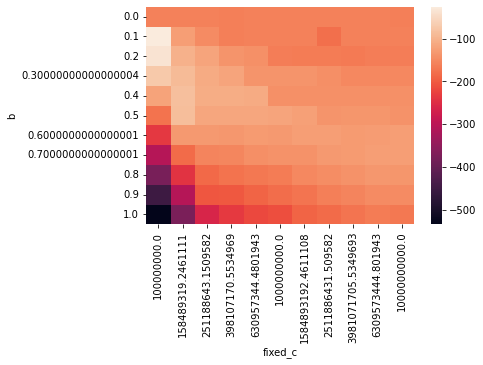

In [92]:
%matplotlib inline

piv = df.loc[df.f == 0.2].groupby(['b','fixed_c']).mean('logL').reset_index().rename(columns={0:'mean_likelihood'})
piv = piv.pivot("b", "fixed_c", "logL")
sns.heatmap(piv)
plt.show()

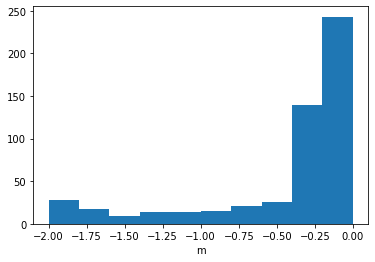

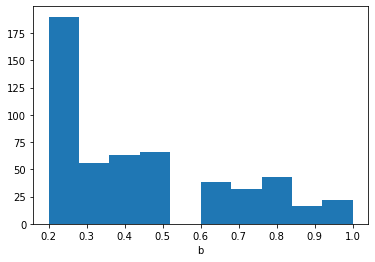

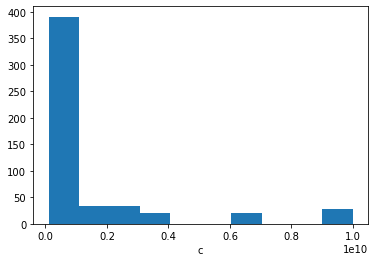

In [98]:
plt.hist(df_keep.m)
plt.xlabel('m')
plt.show()

plt.hist(df_keep.b)
plt.xlabel('b')
plt.show()

plt.hist(df_keep.fixed_c)
plt.xlabel('c')
plt.show()

In [183]:
df_keep.groupby(['b','fixed_c']).sum('likelihood')

m             c     f         logL  intact_frac  \
b   fixed_c                                                            
0.2 1.000000e+08 -63.8  2.750617e+11  33.6 -6247.597190    16.063819   
    1.584893e+08  -4.4  2.535829e+09   3.2  -429.676259     1.226961   
    2.511886e+08  -1.2  1.507132e+09   1.2  -150.967673     0.404831   
0.3 1.584893e+08  -8.4  2.694318e+09   3.4  -657.937299     1.619845   
    2.511886e+08  -5.8  4.772584e+09   3.8  -659.456372     1.658711   
    3.981072e+08  -2.0  3.981072e+09   2.0  -327.533587     0.893692   
    6.309573e+08  -2.0  6.309573e+09   2.0  -260.392724     0.748376   
0.4 1.584893e+08 -10.2  1.426404e+09   1.8  -292.571309     0.776750   
    2.511886e+08  -3.8  2.009509e+09   1.6  -319.210801     0.780752   
    3.981072e+08  -4.0  3.981072e+09   2.0  -288.823569     0.823566   
    6.309573e+08  -1.2  3.785744e+09   1.2  -289.402826     0.643624   
    1.000000e+09  -2.0  1.000000e+10   2.0  -360.767371     0.956250   
    1.584893e+09  -2.0  1.584893e+10   2.0  -287.804631     0.827481   
    2.511886e+09  -2.0  2.511886e+10   2.0  -252.198663     0.692944   
0.5 1.584893e+08 -14.4  1.426404e+09   1.8  -311.094580     0.795353   
    2.511886e+08  -2.4  7.535659e+08   0.6   -93.456836     0.267683   
    3.981072e+08  -1.8  1.194322e+09   0.6   -84.240068     0.222624   
    6.309573e+08  -4.0  6.309573e+09   2.0  -326.678364     0.892597   
    1.584893e+09  -0.2  1.584893e+09   0.2   -49.299844     0.113105   
    2.511886e+09  -2.0  2.511886e+10   2.0  -451.125157     1.033856   
    3.981072e+09  -2.0  3.981072e+10   2.0  -363.266776     0.946986   
    6.309573e+09  -2.0  6.309573e+10   2.0  -326.345679     0.879809   
    1.000000e+10  -2.0  1.000000e+11   2.0  -323.782101     0.843578   
0.6 1.584893e+08 -17.8  1.426404e+09   1.8  -341.425626     0.869699   
    2.511886e+08  -5.4  1.255943e+09   1.0  -159.808805     0.420583   
    3.981072e+08  -2.8  1.592429e+09   0.8  -141.076386     0.349390   
    1.000000e+09  -4.0  1.000000e+10   2.0  -369.909089     0.956212   
    1.584893e+09  -4.0  1.584893e+10   2.0  -246.110516     0.678105   
0.7 2.511886e+08  -7.8  1.507132e+09   1.2  -207.889704     0.528718   
    3.981072e+08  -2.4  1.194322e+09   0.6  -133.514798     0.306357   
    6.309573e+08  -1.8  1.892872e+09   0.6  -134.244732     0.305206   
    1.584893e+09  -4.0  1.584893e+10   2.0  -445.681089     1.027179   
    2.511886e+09  -4.0  2.511886e+10   2.0  -268.537463     0.793015   
0.8 2.511886e+08  -4.8  7.535659e+08   0.6   -78.032983     0.245689   
    3.981072e+08  -3.0  1.194322e+09   0.6  -113.685399     0.285023   
    6.309573e+08  -2.4  1.892872e+09   0.6   -85.392073     0.247362   
    1.000000e+09  -1.8  3.000000e+09   0.6  -105.222369     0.286020   
    2.511886e+09  -0.4  2.511886e+09   0.2   -47.052771     0.110601   
    3.981072e+09  -4.0  3.981072e+10   2.0  -369.493418     0.938908   
    6.309573e+09  -4.0  6.309573e+10   2.0  -287.016543     0.795924   
    1.000000e+10  -4.0  1.000000e+11   2.0  -265.383318     0.716569   
0.9 2.511886e+08  -5.4  7.535659e+08   0.6   -92.731790     0.268109   
    3.981072e+08  -3.6  1.194322e+09   0.6   -97.991097     0.267292   
    1.584893e+09  -1.8  4.754680e+09   0.6  -108.316916     0.272196   
    1.000000e+10  -2.8  7.000000e+10   1.4  -332.451474     0.733240   
1.0 2.511886e+08 -20.0  2.511886e+09   2.0  -387.907208     0.955124   
    3.981072e+08  -4.2  1.194322e+09   0.6   -88.048210     0.245731   
    6.309573e+08  -3.0  1.892872e+09   0.6  -108.559869     0.287599   
    1.000000e+09  -2.4  3.000000e+09   0.6  -108.295153     0.287587   
    2.511886e+09  -1.8  7.535659e+09   0.6   -98.783503     0.265932   

                  disrupted_frac  intact_frac2  disrupted_frac2  \
b   fixed_c                                                       
0.2 1.000000e+08       17.536181     33.575260       134.424740   
    1.584893e+08        1.973039      2.330959        13.669041   
    2.51

In [182]:
np.log(df_keep.loc[(df_keep.b == 0.2) & (df_keep.fixed_c == 1e8)].likelihood.sum())

-29.295815788675263

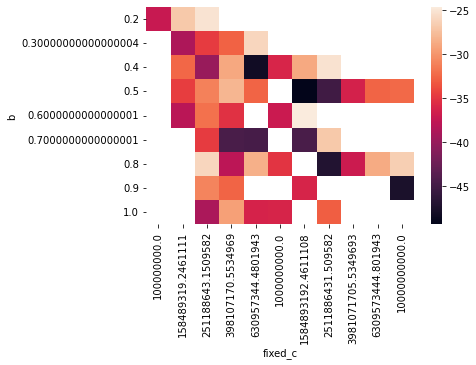

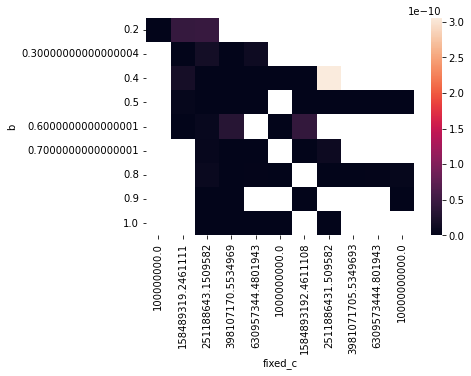

In [187]:
### mean of logL

piv = df_keep.groupby(['b','fixed_c']).mean('logL').reset_index()
#print(df_keep.groupby(['b','fixed_c']).sum('likelihood').reset_index())
#piv['logL_new'] = np.log(piv.likelihood)
piv = piv.pivot("b", "fixed_c", "logL")
sns.heatmap(piv)
plt.show()

piv = df_keep.groupby(['b','fixed_c']).mean('likelihood').reset_index().rename(columns={0:'mean_likelihood'})
piv = piv.pivot("b", "fixed_c", "likelihood")
sns.heatmap(piv)
plt.show()

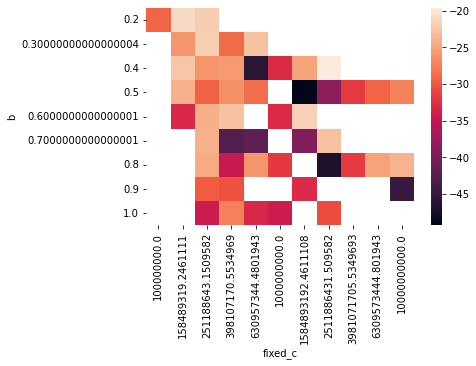

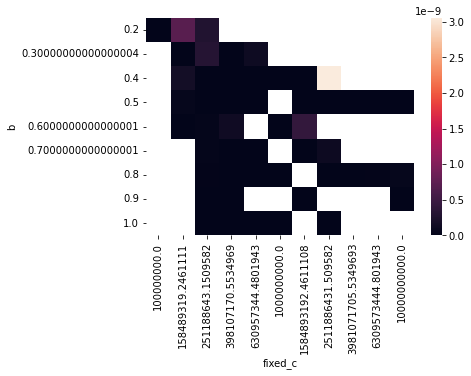

In [93]:
### sum of likelihood, and then re-logged

piv = df_keep.groupby(['b','fixed_c']).sum('likelihood').reset_index().rename(columns={0:'sum_likelihood'})
#print(df_keep.groupby(['b','fixed_c']).sum('likelihood').reset_index())
piv['logL_new'] = np.log(piv.likelihood)
piv = piv.pivot("b", "fixed_c", "logL_new")
sns.heatmap(piv)
plt.show()

piv = df_keep.groupby(['b','fixed_c']).sum('likelihood').reset_index().rename(columns={0:'sum_likelihood'})
piv = piv.pivot("b", "fixed_c", "likelihood")
sns.heatmap(piv)
plt.show()

In [130]:
df_a = df_keep.loc[(np.round(df_keep.b,1) == 0.3) & (df_keep.fixed_c > 6e8) & (df_keep.fixed_c < 1e9)]

In [131]:
df_b = df_keep.loc[(np.round(df_keep.b,1) == 0.4) & (df_keep.fixed_c > 6e8) & (df_keep.fixed_c < 1e9)]

In [147]:
df_c = df_keep.loc[(np.round(df_keep.b,1) == 0.5) & (df_keep.fixed_c > 6e8) & (df_keep.fixed_c < 1e9)]

In [158]:
df_z = df_keep.loc[(np.round(df_keep.b,1) == 1.0) & (df_keep.fixed_c > 6e8) & (df_keep.fixed_c < 1e9)]

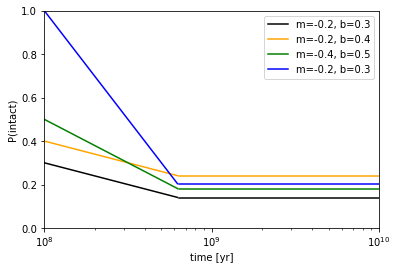

In [171]:
def compute_prob(x, m, b, c):
    return b + m*(np.log10(x)-8)

def compute_prob_after_cutoff(x, m, b, c):
    return b + m*(np.log10(c)-8)
    
%matplotlib inline
x = np.linspace(1e8, 1e10, 1000)
m = -0.2
b = 0.3
c = 6.3e8

plt.plot(x[x < c], compute_prob(x[x < c], m, b, c), color='k', label='m=-0.2, b=0.3')
plt.plot(x[x >= c], np.ones(len(x[x >= c]))*compute_prob_after_cutoff(x[x >= c], m, b, c), color='k')

m = -0.2
b = 0.4
c = 6.3e8

plt.plot(x[x < c], compute_prob(x[x < c], m, b, c), color='orange', label='m=-0.2, b=0.4')
plt.plot(x[x >= c], np.ones(len(x[x >= c]))*compute_prob_after_cutoff(x[x >= c], m, b, c), color='orange')

m = -0.4
b = 0.5
c = 6.3e8

plt.plot(x[x < c], compute_prob(x[x < c], m, b, c), color='green', label='m=-0.4, b=0.5')
plt.plot(x[x >= c], np.ones(len(x[x >= c]))*compute_prob_after_cutoff(x[x >= c], m, b, c), color='green')

m = -1.0
b = 1.0
c = 6.3e8

plt.plot(x[x < c], compute_prob(x[x < c], m, b, c), color='blue', label='m=-0.2, b=0.3')
plt.plot(x[x >= c], np.ones(len(x[x >= c]))*compute_prob_after_cutoff(x[x >= c], m, b, c), color='blue')

plt.xlim(1e8, 1e10)
plt.ylim(0, 1)
plt.xscale('log')
plt.ylabel('P(intact)')
plt.xlabel('time [yr]')
plt.legend()
plt.show()

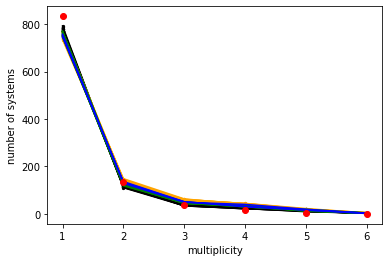

In [173]:
for i in df_a.transit_multiplicity:
    plt.scatter(np.arange(7)[1:], i, color='k', s=5)
    plt.plot(np.arange(7)[1:], i, color='k')

for i in df_b.transit_multiplicity:
    plt.scatter(np.arange(7)[1:], i, color='orange', s=5)
    plt.plot(np.arange(7)[1:], i, color='orange')
    
for i in df_c.transit_multiplicity:
    plt.scatter(np.arange(7)[1:], i, color='green', s=5)
    plt.plot(np.arange(7)[1:], i, color='green')
    
for i in df_z.transit_multiplicity:
    plt.scatter(np.arange(7)[1:], i, color='blue', s=5)
    plt.plot(np.arange(7)[1:], i, color='blue')
    
plt.scatter(np.arange(7)[1:], k, color='red', zorder=2)
    
plt.ylabel('number of systems')
plt.xlabel('multiplicity')
plt.show()

In [159]:
print(np.median(df_a.transit_multiplicity.to_list(), axis=0)) # m=-0.2
print(np.median(df_b.transit_multiplicity.to_list(), axis=0)) # m=-0.2
print(np.median(df_c.transit_multiplicity.to_list(), axis=0)) # m=-0.4
print(np.median(df_z.transit_multiplicity.to_list(), axis=0)) # what? oh, it's cause m=-1.0

print(better_loglike(np.median(df_a.transit_multiplicity.to_list(), axis=0), k))
print(better_loglike(np.median(df_b.transit_multiplicity.to_list(), axis=0), k))
print(better_loglike(np.median(df_c.transit_multiplicity.to_list(), axis=0), k))
print(better_loglike(np.median(df_z.transit_multiplicity.to_list(), axis=0), k))

[775.2 116.6  35.2  24.7  11.9   2.9]
[748.4 142.9  60.   43.2  19.6   4.1]
[760.1 125.9  47.1  32.8  14.6   3.1]
[752.2 133.4  51.   32.2  16.4   3.2]
-25.541816617292383
-48.14874843549158
-32.4014080869258
-34.823220235771295


Looks like the problem of non-smooth color gradients in the heatmap comes largely from the fact that 11x11x11 is just not fine enough of a sample grid. Also, small number statistics...but the variances in logL aren't big enough to explain that away. 

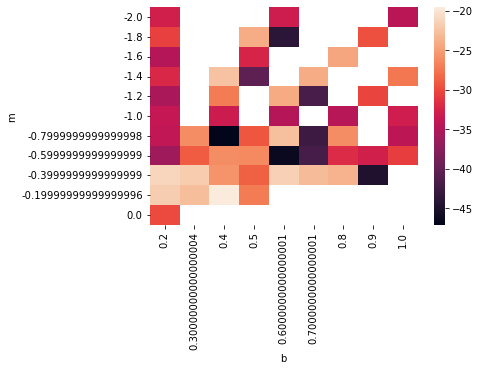

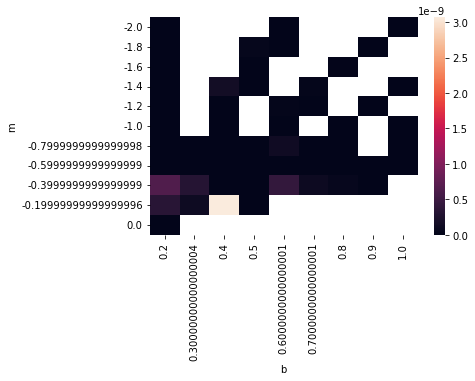

In [103]:
piv = df_keep.groupby(['m','b']).sum('likelihood').reset_index().rename(columns={0:'sum_likelihood'})
#print(df_keep.groupby(['b','fixed_c']).sum('likelihood').reset_index())
piv['logL_new'] = np.log(piv.likelihood)
piv = piv.pivot("m", "b", "logL_new")
sns.heatmap(piv)
plt.show()

piv = df_keep.groupby(['m','b']).sum('likelihood').reset_index().rename(columns={0:'sum_likelihood'})
piv = piv.pivot("m", "b", "likelihood")
sns.heatmap(piv)
plt.show()

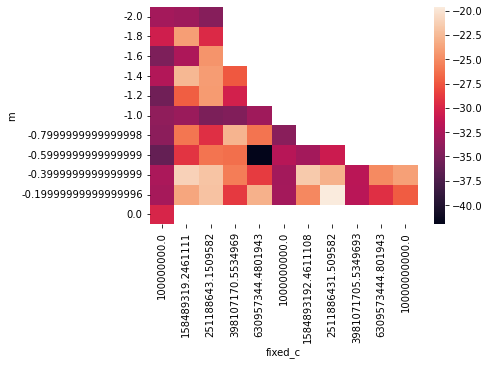

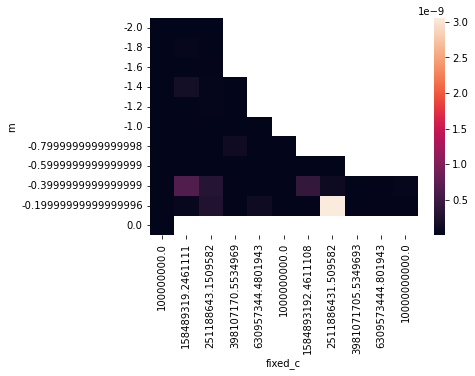

In [104]:
piv = df_keep.groupby(['m','fixed_c']).sum('likelihood').reset_index().rename(columns={0:'sum_likelihood'})
#print(df_keep.groupby(['b','fixed_c']).sum('likelihood').reset_index())
piv['logL_new'] = np.log(piv.likelihood)
piv = piv.pivot("m", "fixed_c", "logL_new")
sns.heatmap(piv)
plt.show()

piv = df_keep.groupby(['m','fixed_c']).sum('likelihood').reset_index().rename(columns={0:'sum_likelihood'})
piv = piv.pivot("m", "fixed_c", "likelihood")
sns.heatmap(piv)
plt.show()

### emcee

In [25]:
import emcee

def log_prob():
    return 

In [30]:
ndim, nwalkers = 3, 10
ivar = 1. / np.random.rand(ndim)
print(ivar)
p0 = np.random.randn(nwalkers, ndim)
print(p0)

#sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=[ivar])
#sampler.run_mcmc(p0, 10000)

[1.50444437 1.16968888 1.34632016]
[[ 0.13901097 -1.25832079 -0.99180628]
 [-0.40180879  0.65863629 -2.20360307]
 [-0.83511283  0.66110892 -0.09119209]
 [ 0.11055307 -1.89515115  1.47381738]
 [-1.01144396  0.35205247 -0.33664609]
 [ 1.42185461 -0.56092347 -0.06399069]
 [ 0.33149321 -0.36662715 -0.80829745]
 [-1.50606791 -0.77259987 -1.03836678]
 [-0.2821688  -2.22714138 -0.08295806]
 [-0.65497419 -1.67212723 -0.06213843]]


In [ ]:
p0 = np.random.rand(10, 1)
